In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/crop-recommendation-dataset/Crop_recommendation.csv


In [3]:
df = pd.read_csv('/kaggle/input/crop-recommendation-dataset/Crop_recommendation.csv')

In [4]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [5]:
df = df.sample(frac=1).reset_index(drop=True)
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,23,21,26,26.454887,93.450426,5.901496,149.222026,coconut
1,107,31,31,23.171246,52.978412,6.766184,153.120164,coffee
2,35,52,19,27.106068,89.895933,6.698574,37.456806,mungbean
3,108,92,53,27.400536,82.962213,6.276800,104.937800,banana
4,28,46,16,29.008124,84.960894,6.664188,45.910114,mungbean
...,...,...,...,...,...,...,...,...
2195,30,25,31,26.312706,98.620480,5.804965,208.118138,coconut
2196,89,11,47,29.787140,94.653435,6.327823,27.865944,muskmelon
2197,30,75,25,30.332766,42.352499,6.446092,149.299952,pigeonpeas
2198,100,48,16,25.718958,67.221907,5.549902,74.514908,maize


<Axes: >

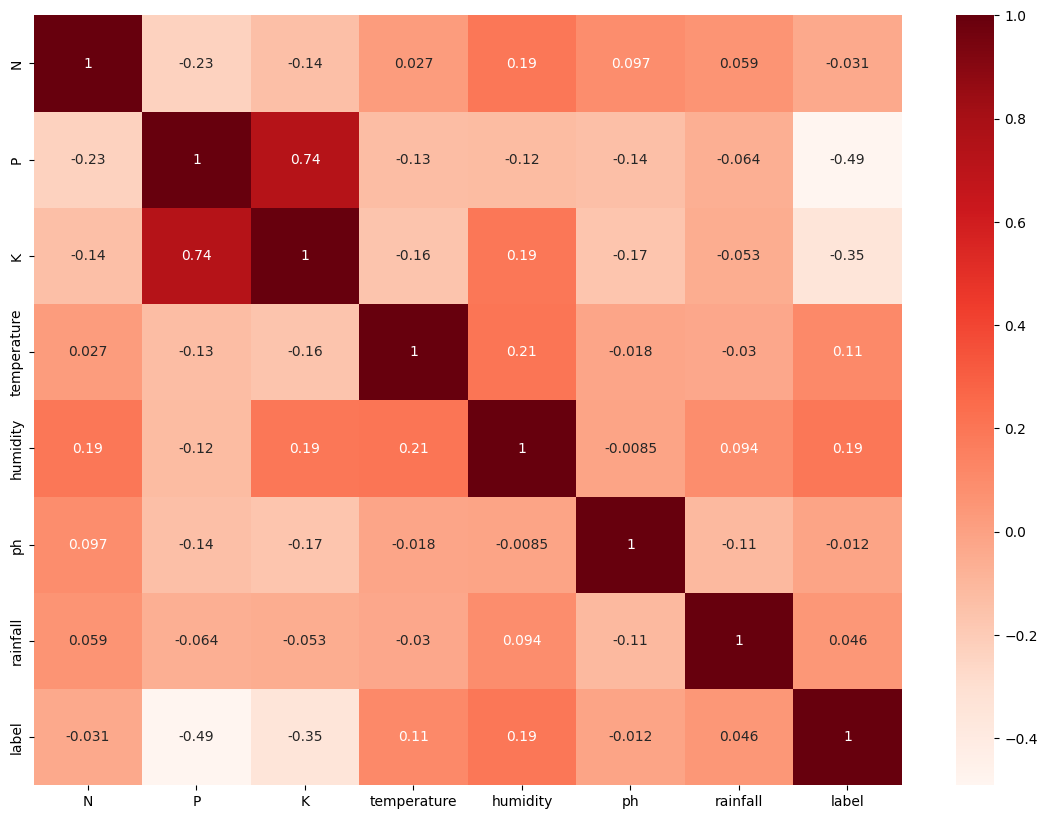

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
df_enc = df
df_enc['label'] = encoder.fit_transform(df['label']) 
corr_matrix = df_enc.corr()
plt.figure(figsize=(14,10))
sns.heatmap(corr_matrix,annot=True,cmap='Reds')

In [29]:
X= df.drop(columns = ['label', 'ph', 'rainfall'])
y= df['label']

In [30]:
X

,N,P,K,temperature,humidity
0,23,21,26,26.454887,93.450426
1,107,31,31,23.171246,52.978412
2,35,52,19,27.106068,89.895933
3,108,92,53,27.400536,82.962213
4,28,46,16,29.008124,84.960894
...,...,...,...,...,...
2195,30,25,31,26.312706,98.620480
2196,89,11,47,29.787140,94.653435
2197,30,75,25,30.332766,42.352499
2198,100,48,16,25.718958,67.221907


In [31]:
y

0          coconut
1           coffee
2         mungbean
3           banana
4         mungbean
           ...    
2195       coconut
2196     muskmelon
2197    pigeonpeas
2198         maize
2199        orange
Name: label, Length: 2200, dtype: object

In [32]:
num_classes = len(np.unique(y))
print(num_classes)

22


In [33]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [34]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[0.16428571, 0.11428571, 0.105     , 0.5058624 , 0.92380824],
       [0.76428571, 0.18571429, 0.13      , 0.41163976, 0.45168734],
       [0.25      , 0.33571429, 0.07      , 0.52454774, 0.88234378],
       ...,
       [0.21428571, 0.5       , 0.1       , 0.6171364 , 0.32773217],
       [0.71428571, 0.30714286, 0.055     , 0.48474524, 0.61784294],
       [0.27857143, 0.02857143, 0.05      , 0.47429234, 0.90469344]])

In [35]:
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

In [36]:
y_encoded

array([ 4,  5, 14, ..., 18, 11, 16])

In [37]:
import torch
import torch.nn as nn
import torch.optim as optim

In [38]:
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y_encoded, dtype=torch.float32).reshape(-1, 1)

In [39]:
X_tensor

tensor([[0.1643, 0.1143, 0.1050, 0.5059, 0.9238],
        [0.7643, 0.1857, 0.1300, 0.4116, 0.4517],
        [0.2500, 0.3357, 0.0700, 0.5245, 0.8823],
        ...,
        [0.2143, 0.5000, 0.1000, 0.6171, 0.3277],
        [0.7143, 0.3071, 0.0550, 0.4847, 0.6178],
        [0.2786, 0.0286, 0.0500, 0.4743, 0.9047]])

In [40]:
y_tensor = y_tensor.squeeze().long()
y_tensor

tensor([ 4,  5, 14,  ..., 18, 11, 16])

In [41]:
y_tensor.shape

torch.Size([2200])

In [42]:
X.shape

(2200, 5)

In [43]:
model = nn.Sequential(
    nn.Linear(5, 40),
    nn.ReLU(),
    nn.Linear(40, 25),
    nn.ReLU(),
    nn.Linear(25, 22))

In [44]:
print(model)

Sequential(
  (0): Linear(in_features=5, out_features=40, bias=True)
  (1): ReLU()
  (2): Linear(in_features=40, out_features=25, bias=True)
  (3): ReLU()
  (4): Linear(in_features=25, out_features=22, bias=True)
)


In [45]:
loss_fn = nn.CrossEntropyLoss()
optimizer= optim.Adam(model.parameters(), lr=0.001)

In [46]:
n_epochs =10000
batch_size =200


for epoch in range(n_epochs):
    for i in range(0, len(X_tensor), batch_size):
        X_batch = X_tensor[i: i+batch_size]
        y_pred = model(X_batch)
        y_batch = y_tensor[i: i+batch_size]
        loss = loss_fn(y_pred, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if epoch % 50 == 0:
        _, predicted = torch.max(y_pred, 1)
        print(f'Finished epoch {epoch}, latest loss {loss}')
        print("Predicted:", predicted[:5].tolist())
        print("Actual   :", y_batch[:5].tolist())


Finished epoch 0, latest loss 3.083817958831787
Predicted: [18, 18, 18, 18, 1]
Actual   : [21, 8, 15, 20, 3]
Finished epoch 50, latest loss 0.7188369035720825
Predicted: [21, 20, 15, 20, 3]
Actual   : [21, 8, 15, 20, 3]
Finished epoch 100, latest loss 0.4046987295150757
Predicted: [21, 20, 15, 20, 3]
Actual   : [21, 8, 15, 20, 3]
Finished epoch 150, latest loss 0.26802539825439453
Predicted: [21, 20, 15, 20, 3]
Actual   : [21, 8, 15, 20, 3]
Finished epoch 200, latest loss 0.211599200963974
Predicted: [21, 20, 15, 20, 3]
Actual   : [21, 8, 15, 20, 3]
Finished epoch 250, latest loss 0.1834743320941925
Predicted: [21, 20, 15, 20, 3]
Actual   : [21, 8, 15, 20, 3]
Finished epoch 300, latest loss 0.16561967134475708
Predicted: [21, 20, 15, 20, 3]
Actual   : [21, 8, 15, 20, 3]
Finished epoch 350, latest loss 0.15398477017879486
Predicted: [21, 20, 15, 20, 3]
Actual   : [21, 8, 15, 20, 3]
Finished epoch 400, latest loss 0.14525912702083588
Predicted: [21, 20, 15, 20, 3]
Actual   : [21, 8, 15, 

In [52]:
with torch.no_grad():
    y_pred = model(X_tensor)
 
pred_classes = y_pred.argmax(dim=1)
accuracy = (pred_classes == y_tensor).float().mean()
print(f"Accuracy {accuracy*100}")

Accuracy 96.90909576416016


In [25]:
import pickle

In [53]:
filename = 'finalized_model.pkl'
pickle.dump(model, open(filename, 'wb'))

In [55]:
filename = 'finalized_scaler.pkl'
pickle.dump(scaler, open(filename, 'wb'))